In [120]:
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

In [121]:
social = pd.read_csv('SocialNetworkAds.csv')
social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [122]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [123]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [124]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [125]:
social.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [126]:
print(social.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [127]:
social.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


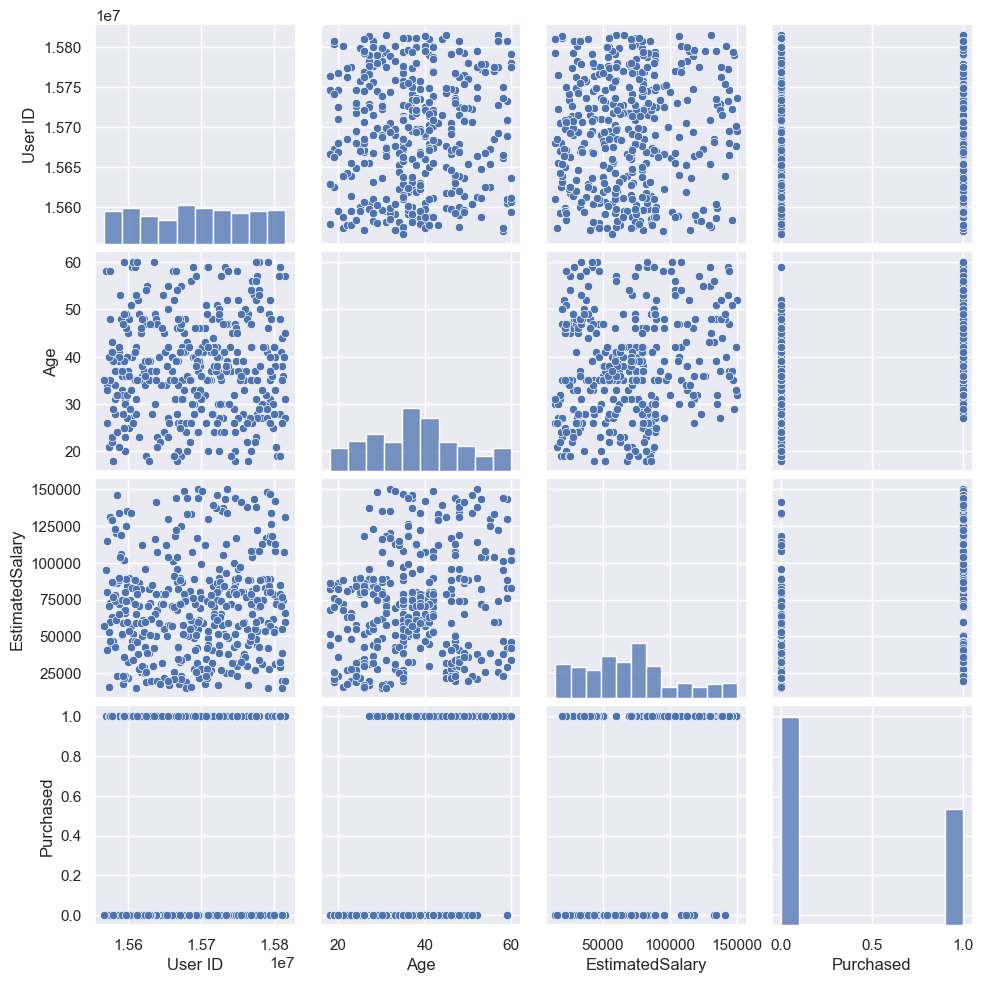

In [128]:
sns.pairplot(social)

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
encoder = LabelEncoder()

In [131]:
social['new_gender'] = encoder.fit_transform(social['Gender']) 

In [132]:
social

,User ID,Gender,Age,EstimatedSalary,Purchased,new_gender
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [133]:
social.drop('Gender', axis=1, inplace=True)

In [134]:
social

,User ID,Age,EstimatedSalary,Purchased,new_gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


<Axes: >

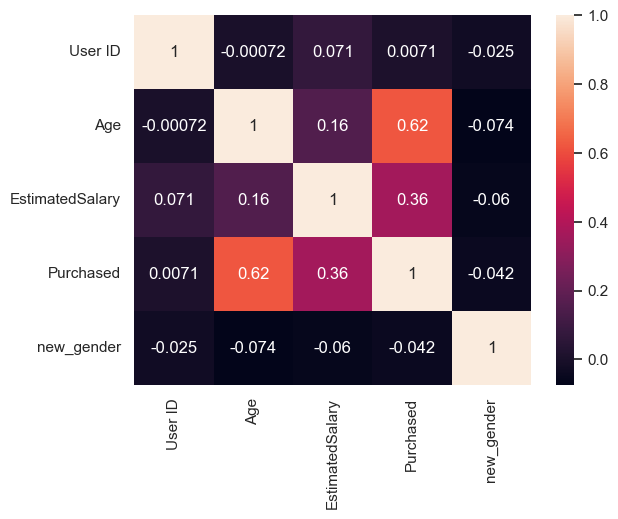

In [135]:
sns.heatmap(social.corr(), annot=True)

In [136]:
# to check for outliers: odd values that are not 
z_scores = np.abs((social - social.mean()) / social.std())

In [137]:

outliers = social[z_scores > 2]

In [138]:
outliers

,User ID,Age,EstimatedSalary,Purchased,new_gender
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN


In [139]:
x=social.drop(['Purchased'], axis=1)

In [140]:
x

,User ID,Age,EstimatedSalary,new_gender
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [141]:
x = x.drop(['User ID'], axis=1)

In [142]:
x

,Age,EstimatedSalary,new_gender
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [143]:
y = social['Purchased']

In [144]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [145]:
y.nunique()

2

In [146]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [147]:
# Normalizing the data by scaling the x features
from sklearn.preprocessing import StandardScaler

In [148]:
# Using standardization scalar to get Z-score normalization which substract the mean and divide by the standard deviation for each features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) 

In [149]:
x_scaled

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)

In [152]:
x_test

array([[-0.73115301,  0.50676401,  1.02020406],
       [ 0.98808332, -1.07893824,  1.02020406],
       [ 0.41500455,  0.00756145, -0.98019606],
       [-1.01769239, -0.37418169, -0.98019606],
       [ 0.31949142, -0.52100597,  1.02020406],
       [ 0.31949142,  0.06629116, -0.98019606],
       [ 1.17910958, -0.75592482, -0.98019606],
       [-0.25358736,  1.123426  ,  1.02020406],
       [ 2.13424088,  0.38930459,  1.02020406],
       [ 1.65667523, -0.9027491 ,  1.02020406],
       [ 0.31949142, -0.19799255, -0.98019606],
       [-0.54012675,  0.88850715,  1.02020406],
       [-0.0625611 , -0.2273574 , -0.98019606],
       [ 1.08359645,  0.56549373,  1.02020406],
       [ 0.31949142, -1.16703281, -0.98019606],
       [-0.73115301,  1.91627713,  1.02020406],
       [-1.39974491, -0.19799255,  1.02020406],
       [ 0.22397829, -0.31545197,  1.02020406],
       [-0.25358736, -0.13926283, -0.98019606],
       [-0.15807423,  0.85914229,  1.02020406],
       [ 0.41500455, -0.16862769,  1.020

In [153]:
x_train.shape

(320, 3)

In [154]:
y_train.shape

(320,)

In [155]:
#!pip install imbalanced-learn
# To balance the target variable y so it will not be partial using smote(synthethic minority over-sampling technique)
from imblearn.over_sampling import SMOTE
# initialize SMOTE
smote = SMOTE(random_state=20)

In [156]:
# initialize SMOTE
smote = SMOTE(random_state=20)
x_res, y_res = smote.fit_resample(x_scaled, y)

In [157]:
# varifying the balance
print('Original training data shape:', x_train.shape, y_train.shape)

Original training data shape: (320, 3) (320,)


In [158]:
print('Resampled training data shape:', x_res.shape, y_res.shape)

Resampled training data shape: (514, 3) (514,)


In [159]:
print(x_scaled.shape)

(400, 3)


In [160]:
print(y_res.shape)

(514,)


In [161]:
# using Normalization
#from sklearn.preprocessing import Normalizer
#scaler = Normalizer()
#x_scaled =scaler.fit_transform(x)

In [162]:
#x_scaled

# LOGISTIC REGRESSION  MODEL

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
lr = LogisticRegression()

In [165]:
 lr.fit(x_res, y_res)

LogisticRegression()

In [166]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [167]:
from sklearn.metrics import classification_report, confusion_matrix

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        56
           1       0.67      0.67      0.67        24

    accuracy                           0.80        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.80      0.80      0.80        80



In [169]:
print(confusion_matrix(y_test, y_pred))

[[48  8]
 [ 8 16]]


In [170]:
# TESTING LOGISTIC MODEL
predict_lr = lr.predict([[19,	19000,	1]])
predict_lr

array([1], dtype=int64)

# KNEIGHBORS MODEL

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
 knn = KNeighborsClassifier()

In [173]:
knn.fit(x_res, y_res)

KNeighborsClassifier()

In [174]:
y_knnpred = knn.predict(x_test)

In [175]:
y_knnpred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [176]:
print(confusion_matrix(y_test, y_knnpred))

[[53  3]
 [ 1 23]]


In [177]:
print(classification_report(y_test, y_knnpred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.88      0.96      0.92        24

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [178]:
# TESTING KNEIGHBOUR MODEL
predict_knn = knn.predict([[19,	19000,	1]])
predict_knn

array([1], dtype=int64)

# DECISION TREE MODEL

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dtf = DecisionTreeClassifier()

In [181]:
dtf.fit(x_res, y_res)

DecisionTreeClassifier()

In [182]:
y_dtfpred = dtf.predict(x_test)

In [183]:
y_dtfpred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [184]:
from sklearn.metrics import classification_report, confusion_matrix

In [185]:
print(confusion_matrix(y_test, y_dtfpred))

[[56  0]
 [ 0 24]]


In [186]:
print(classification_report(y_test, y_dtfpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        24

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [187]:
# TESTING DECISION TREE MODEL
predict_dtf = dtf.predict([[19,	19000,	1]])
predict_dtf

array([1], dtype=int64)

# SAVING OF THE MODEL

In [188]:
import joblib
# Save the trained model to a file
joblib.dump(dtf, 'dtf_model.joblib')



['dtf_model.joblib']

In [189]:
# To load the model
loaded_model = joblib.load('dtf_model.joblib')

In [190]:
# using the loaded model for prediction
predictions = loaded_model.predict(x_test)

In [191]:
predictions = loaded_model.predict([[19, 19000, 1]])
predictions

array([1], dtype=int64)

# RANDOM FOREST MODEL

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rfc = RandomForestClassifier()

In [194]:
rfc.fit(x_res, y_res)

RandomForestClassifier()

In [195]:
y_rfcpred = rfc.predict(x_test)

In [196]:
y_rfcpred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [197]:
error_rate=[]
for i in range(1, 400):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_res, y_res)
    pred_i = rfc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error_rate')

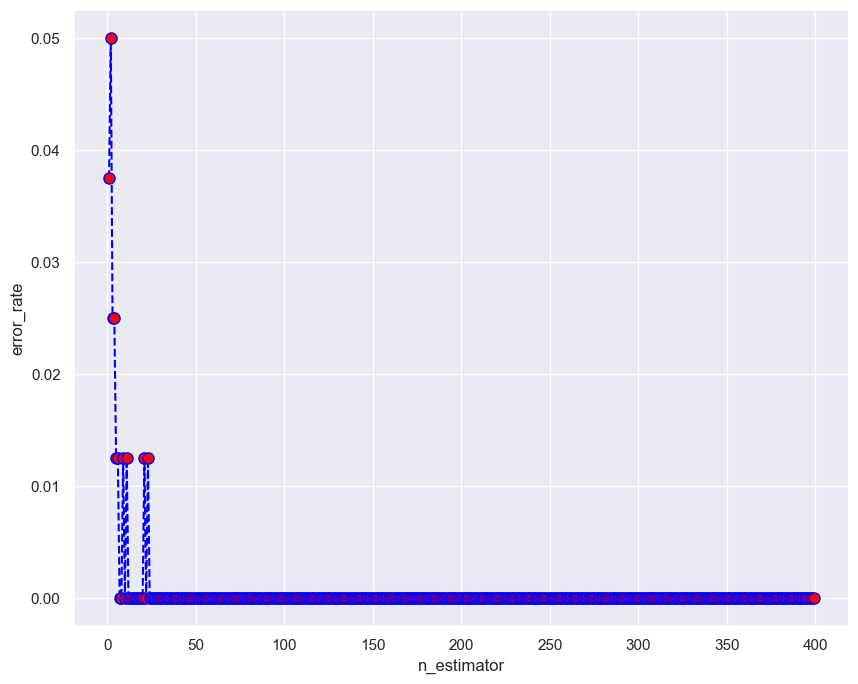

In [198]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 400), error_rate, marker='o', markersize=8, markerfacecolor='red', color='blue', linestyle='dashed')
plt.xlabel('n_estimator')
plt.ylabel('error_rate')

In [199]:
print(classification_report(y_test, y_rfcpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        24

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [200]:
print(confusion_matrix(y_test, y_rfcpred))

[[56  0]
 [ 0 24]]


# KNEIGHBORS MODEL

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
knc = KNeighborsClassifier()

In [203]:
knc.fit(x_res, y_res)

KNeighborsClassifier()

In [204]:
y_kncpred = knc.predict(x_test)

In [205]:
y_kncpred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [206]:
print(confusion_matrix(y_test, y_kncpred))

[[53  3]
 [ 1 23]]


In [207]:
print(classification_report(y_test, y_kncpred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.88      0.96      0.92        24

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [208]:
error_rate = []
for i in range(1,50):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_res, y_res)
    pred_i = knc.predict(x_test)
    error_rate.append(np.mean(pred_i!= y_test))

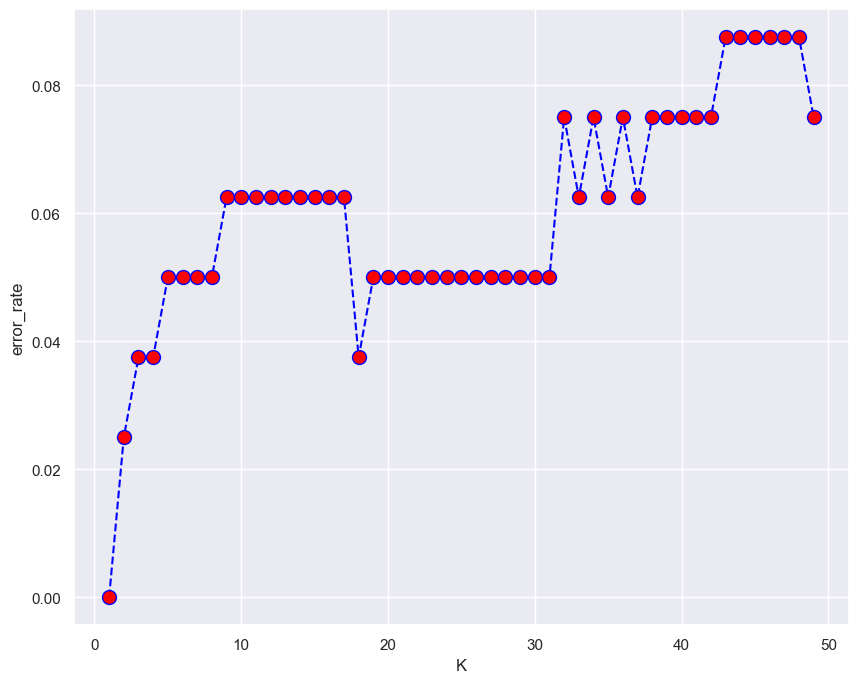

In [209]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), error_rate, marker = 'o', color='blue', linestyle='dashed', markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('error_rate')
plt.show()

# SCALAR/SUPPORT VECTOR MODEL  

In [210]:
from sklearn import svm
# support vector machine has many package 
# 1: SVC support vector classifier those that point near to the hperplane whose distance are minimized or 

In [211]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_res, y_res)
# kernel= linear or polynomial, radialbasis function(RBF), sigmoid

SVC(C=2, gamma='auto', kernel='linear')

In [212]:
y_pred = classifier.predict(x_test)

In [213]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [214]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        56
           1       0.66      0.79      0.72        24

    accuracy                           0.81        80
   macro avg       0.78      0.81      0.79        80
weighted avg       0.83      0.81      0.82        80



In [215]:
print(confusion_matrix(y_test, y_pred))

[[46 10]
 [ 5 19]]


In [216]:
from sklearn.svm import SVC

In [217]:
svc = SVC()

In [218]:
svc.fit(x_res, y_res)

SVC()

In [219]:
pred = svc.predict(x_test)

In [220]:
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [221]:
print(confusion_matrix(y_test, pred))

[[52  4]
 [ 1 23]]


In [222]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.85      0.96      0.90        24

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.001]}

In [225]:
gsv = GridSearchCV(SVC(), param_grid, verbose = 3)

In [226]:
gsv.fit(x_res, y_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.932 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.922 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.932 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.864 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.922 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.864 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.864 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.863 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.786 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001]},
             verbose=3)

In [227]:
gsv.best_params_

{'C': 1, 'gamma': 1}

In [228]:
y_pred = gsv.predict(x_test)

In [229]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [230]:
print(confusion_matrix(y_test, y_pred))

[[52  4]
 [ 1 23]]


In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.85      0.96      0.90        24

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



# SAVING OF YOUR MODEL

In [248]:
import pickle as plk 

In [252]:

save_model = "gsv.plk"
plk.dump(gsv, open(save_model, "wb"))
loaded_model = plk.load(open(save_model, "rb"))


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001]},
             verbose=3)

In [ ]:
prediction = loaded_model.predict([[19, 19000, 1]])

In [ ]:
prediction

array([1], dtype=int64)

# Naive Bayes Classifier
It work by probability
where to apply it; face recognition, weather prediction, medical diadnosis, news classification
Advantage
very simple and easy to implement
Needs less traing data
handlesboth continous and discrete data
highly scalable with number of predictors and data points
As it is fast, it can be used in real time predictions
Not sensitive to irrevelent features


In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
data = fetch_20newsgroups()
data.target_names

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [234]:
import pandas

In [235]:
pandas.__version__

'2.0.3'

In [236]:
import seaborn
seaborn.__version__

'0.13.2'

In [237]:
import matplotlib
matplotlib.__version__

'3.7.5'

In [238]:
import numpy
numpy.__version__

'1.23.5'

In [244]:
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.12.3


In [245]:
import sklearn
print(sklearn.__version__)

1.3.2


In [258]:
import joblib
joblib.__version__

'1.4.2'

In [259]:
import streamlit
streamlit.__version__

'1.33.0'